## 평가 지표와 측정
### 최종 목표를 기억하라
* 머신러닝 평가 지표를 선택하기 전에 비즈니스 지표라고 부르는 애플리케이션의 고차원적인 목표를 생각해야 한다.
* 어떤 머신러닝 애플리케이션에서 특정 알고리즘을 선택하여 나타난 결과를 비즈니스 임팩트(business impact)라고 한다.
### 이진 분류의 평가 지표

* 에러의 종류
    * 거짓 양성 (false positive)
        * 실제로는 음성인데 양성으로 잘못 예측한 경우
    * 거짓 음성 (false negative)
        * 실제로는 양성인데 음성으로 잘못 예측한 경우


* 불균형 데이터셋 (imbalanced datasets)
    * 한 클래스가 다른 것보다 훨씬 많은 데이터셋

In [2]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

In [4]:
import numpy as np
from sklearn.dummy import DummyClassifier

dummy_majority = DummyClassifier(strategy='most_frequent').fit(X_train, y_train)
pred_most_frequent = dummy_majority.predict(X_test)
print('predicted labels:', np.unique(pred_most_frequent))
print(f'test score: {dummy_majority.score(X_test, y_test):.4f}')

predicted labels: [False]
test score: 0.8956


In [5]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(max_depth=2).fit(X_train, y_train)
pred_tree = tree.predict(X_test)
print(f'test score: {tree.score(X_test, y_test):.4f}')

test score: 0.9178


In [6]:
from sklearn.linear_model import LogisticRegression

dummy = DummyClassifier(strategy='stratified').fit(X_train, y_train)
pred_dummy = dummy.predict(X_test)
print(f'dummy score: {dummy.score(X_test, y_test):.3f}')

logreg = LogisticRegression(C=0.1, max_iter=1000).fit(X_train, y_train)
pred_logreg = logreg.predict(X_test)
print(f'logreg score: {logreg.score(X_test, y_test):.3f}')

dummy score: 0.800
logreg score: 0.984


* 오차 행렬 (confusion matrix)
    * 이진 분류 평가 결과를 나타낼 때 가장 널리 사용하는 방법 중 하나.

In [7]:
from sklearn.metrics import confusion_matrix

confusion = confusion_matrix(y_test, pred_logreg)
print(f'confusion matrix:\n{confusion}')

confusion matrix:
[[402   1]
 [  6  41]]


* 행은 정답 클래스
* 열은 예측 클래스

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


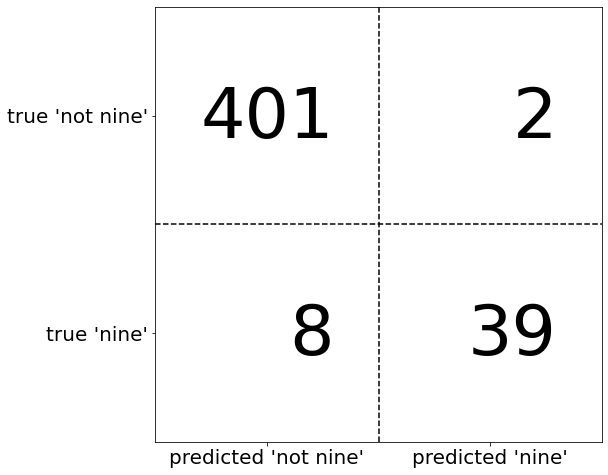

In [9]:
import mglearn

mglearn.plots.plot_confusion_matrix_illustration()

* 오차 행렬의 대각 행렬은 정확히 분류된 경우
* 다른 항목은 한 클래스의 샘플들이 다른 클래스로 잘못 분류된 경우.

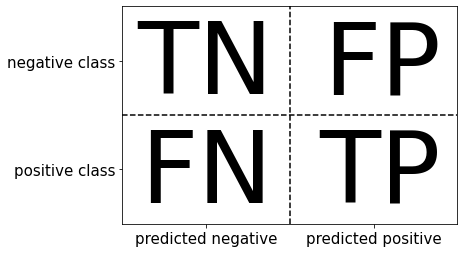

In [10]:
mglearn.plots.plot_binary_confusion_matrix()

In [12]:
print('frequency dummy model:')
print(confusion_matrix(y_test, pred_most_frequent))
print('\nrandom dummy model:')
print(confusion_matrix(y_test, pred_dummy))
print('\ndecision tree')
print(confusion_matrix(y_test, pred_tree))
print('\nlogistic regression')
print(confusion_matrix(y_test, pred_logreg))

frequency dummy model:
[[403   0]
 [ 47   0]]

random dummy model:
[[350  53]
 [ 45   2]]

decision tree
[[390  13]
 [ 24  23]]

logistic regression
[[402   1]
 [  6  41]]


* 정확도와의 관계
    * $정확도 = \frac{TP+TN}{TP+TN+FP+FN}$
    * 정확하 예측한 수 (TP, TN)를 전체 샘플 수(오차 행렬의 모든 항목을 더한 값)로 나눈 것.

* 정밀도, 재현율, f-점수
    * 오차 행렬의 결과를 요약하는 여러 방법 중 가장 일반적인 것 - 정밀도(precision), 재현율(recall)
    * 정밀도
        * 정밀도는 양성으로 예측된 것(TP + FP) 중 얼마나 많은 샘플이 진짜 양성(TP)인지 측정.
        * $정밀도=\frac{TP}{TP+FP}$
        * 정밀도는 거짓 양성(FP)의 수를 줄이는 것이 목표일 때 성능 지표로 사용.
        * 정밀도는 양성 예측도 (PPV)라고도 한다.
    * 재현율
        * 전체 양성 샘플(TP + FN) 중에서 얼마나 많은 샘플이 양성 클래스(TP)로 분류되는지를 측정.
        * $재현율=\frac{TP}{TP+FN}$
        * 모든 양성 샘플을 식별해야 할 때 성능 지표로 사용. => 거짓 음성(FN)을 피하는 것이 중요할 때.
        * 민감도(sensitivity), 적중률(hit rate), 진짜 양성 비율(TPR)
    * 재현율 최적화와 정밀도 최적화는 상충한다.
    * 정밀도와 재현율의 조화 평균 - f-점수 (f-score)
        * $F=2*\frac{정밀도*재현율}{청밀도+재현율}$
        * $f_1-점수$

In [16]:
from sklearn.metrics import f1_score

print('frequency dummy model f1 score:', f1_score(y_test, pred_most_frequent))
print('random dummy model f1 score:', f1_score(y_test, pred_dummy))
print('tree model f1 score:', f1_score(y_test, pred_tree))
print('logistic regression model f1 score:', f1_score(y_test, pred_logreg))

frequency dummy model f1 score: 0.0
random dummy model f1 score: 0.03921568627450981
tree model f1 score: 0.5542168674698795
logistic regression model f1 score: 0.9213483146067415


In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test, pred_most_frequent, target_names=['not 9', '9'], zero_division=0))

              precision    recall  f1-score   support

       not 9       0.90      1.00      0.94       403
           9       0.00      0.00      0.00        47

    accuracy                           0.90       450
   macro avg       0.45      0.50      0.47       450
weighted avg       0.80      0.90      0.85       450



In [18]:
print(classification_report(y_test, pred_dummy, target_names=['not 9', '9']))

              precision    recall  f1-score   support

       not 9       0.89      0.87      0.88       403
           9       0.04      0.04      0.04        47

    accuracy                           0.78       450
   macro avg       0.46      0.46      0.46       450
weighted avg       0.80      0.78      0.79       450



In [19]:
print(classification_report(y_test, pred_logreg, target_names=['not 9', '9']))

              precision    recall  f1-score   support

       not 9       0.99      1.00      0.99       403
           9       0.98      0.87      0.92        47

    accuracy                           0.98       450
   macro avg       0.98      0.93      0.96       450
weighted avg       0.98      0.98      0.98       450



* 불확실성 고려

In [21]:
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

X, y = make_blobs(n_samples=(400, 50), cluster_std=[7.0, 2], random_state=22)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
svc = SVC(gamma=.05).fit(X_train, y_train)

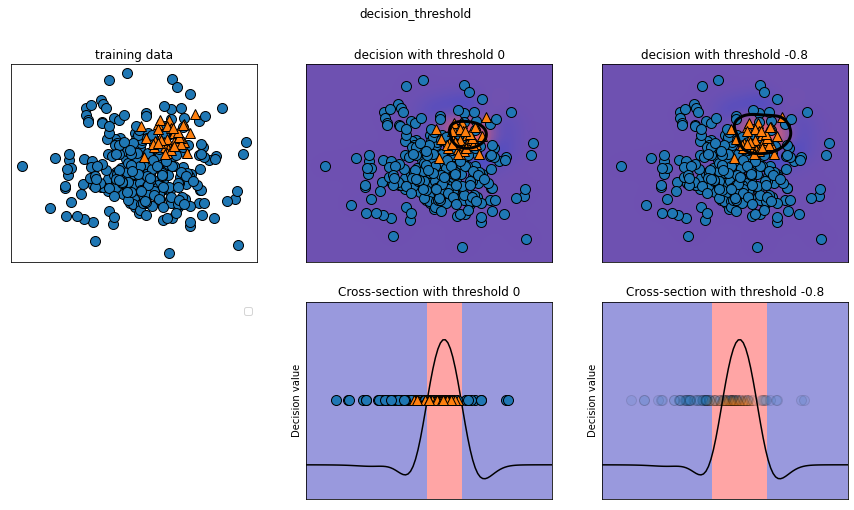

In [22]:
mglearn.plots.plot_decision_threshold()

In [23]:
print(classification_report(y_test, svc.predict(X_test)))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       104
           1       0.35      0.67      0.46         9

    accuracy                           0.88       113
   macro avg       0.66      0.78      0.70       113
weighted avg       0.92      0.88      0.89       113



In [24]:
y_pred_lower_threshold = svc.decision_function(X_test) > -.8

In [25]:
print(classification_report(y_test, y_pred_lower_threshold))

              precision    recall  f1-score   support

           0       1.00      0.82      0.90       104
           1       0.32      1.00      0.49         9

    accuracy                           0.83       113
   macro avg       0.66      0.91      0.69       113
weighted avg       0.95      0.83      0.87       113



* 정밀도-재현율 곡선과 ROC 곡선
    * 모델의 분류 작업을 결정하는 임계값을 바꾸는 것은 해당 분류기의 정밀도와 재현율의 상충 관계를 조정하는 일이다.
    * 분류기의 필요조건을 지정하는 것을 종종 운영 포인트(operating point)를 지정한다고 말한다.
    * 새로운 모델을 만들 때는 운영 포인트가 명확하지 않은 경우가 많다.
    * 문제를 더 잘 이해하기 위해 모든 임계값을 조사해보거나, 한 번에 정밀도나 재현율의 모든 장단점을 살퍼보는 것이 좋다.
    * 정밀도-재현율 곡선(precision-recall curve)

In [26]:
from sklearn.metrics import precision_recall_curve

precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))

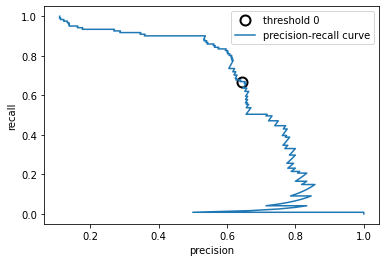

In [28]:
import matplotlib.pyplot as plt

X, y = make_blobs(n_samples=(4000, 500), cluster_std=[7.0, 2], random_state=22)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

svc = SVC(gamma=.05).fit(X_train, y_train)

precision, recall, thresholds = precision_recall_curve(y_test, svc.decision_function(X_test))
close_zero = np.argmin(np.abs(thresholds))
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label='threshold 0', fillstyle='none', c='k', mew=2)

plt.plot(precision, recall, label='precision-recall curve')
plt.xlabel('precision')
plt.ylabel('recall')
plt.legend(loc='best')

* 곡선이 오른쪽 위로 갈수록 더 좋은 분류기이다.

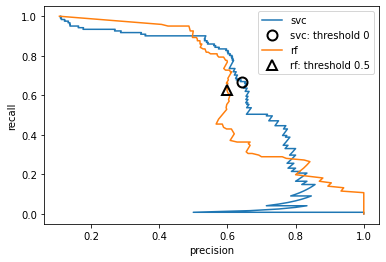

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=0, max_features=2)
rf.fit(X_train, y_train)

precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(precision, recall, label='svc')
plt.plot(precision[close_zero], recall[close_zero], 'o', markersize=10, label='svc: threshold 0', fillstyle='none', c='k', mew=2)
plt.plot(precision_rf, recall_rf, label='rf')

close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(precision_rf[close_default_rf], recall_rf[close_default_rf], '^', c='k', markersize=10, label='rf: threshold 0.5', fillstyle='none', mew=2)
plt.xlabel('precision')
plt.ylabel('recall')
plt.legend(loc='best')

In [31]:
print('random forest f1_score:', f1_score(y_test, rf.predict(X_test)))
print('svc f1_score:', f1_score(y_test, svc.predict(X_test)))

random forest f1_score: 0.6097560975609757
svc f1_score: 0.6558704453441295


* 평균 정밀도(average precision)
    * 정밀도-재현율 곡선의 아랫부분 면적을 계산.

In [32]:
from sklearn.metrics import average_precision_score

ap_rf = average_precision_score(y_test, rf.predict_proba(X_test)[:, 1])
ap_svc = average_precision_score(y_test, svc.decision_function(X_test))
print('random forest ap:', ap_rf)
print('svc ap:', ap_svc)

random forest ap: 0.659559370099291
svc ap: 0.6663140319391998


* ROC와 AUC
    * ROC 곡선 (receiver operating characteristics) => TPR-FPR 곡선
        * 진짜 양성 비율(TPR)에 대한 거짓 양성 비율(FPR)
        * $FPR = \frac{FP}{FP + TN}$

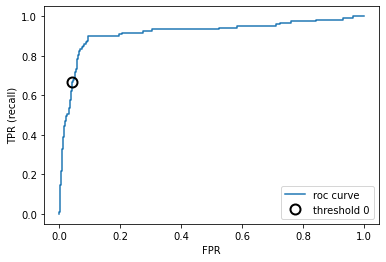

In [34]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, svc.decision_function(X_test))

plt.plot(fpr, tpr, label='roc curve')
plt.xlabel('FPR')
plt.ylabel('TPR (recall)')

close_zero = np.argmin(np.abs(thresholds))
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label='threshold 0', fillstyle='none', c='k', mew=2)
plt.legend(loc=4)

* ROC 곡선은 왼쪽 위에 가까울수록 이상적.
* 거짓 양성 비율(FPR)이 낮게 유지되면서 재현율이 높은 분류기가 좋은 것.

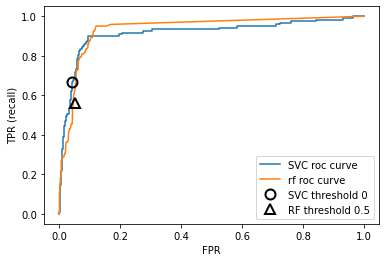

In [35]:
from sklearn.metrics import roc_curve
fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])

plt.plot(fpr, tpr, label='SVC roc curve')
plt.plot(fpr_rf, tpr_rf, label='rf roc curve')

plt.xlabel('FPR')
plt.ylabel('TPR (recall)')
plt.plot(fpr[close_zero], tpr[close_zero], 'o', markersize=10, label='SVC threshold 0', fillstyle='none', c='k', mew=2)
close_default_rf = np.argmin(np.abs(thresholds_rf - 0.5))
plt.plot(fpr_rf[close_default_rf], tpr[close_default_rf], '^', markersize=10, label='RF threshold 0.5', fillstyle='none', c='k', mew=2)
plt.legend(loc=4)

* AUC(area under the curve)

In [36]:
from sklearn.metrics import roc_auc_score

rf_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])
svc_auc = roc_auc_score(y_test, svc.decision_function(X_test))
print('random forest auc:', rf_auc)
print('SVC AUC:', svc_auc)

random forest auc: 0.9366953672911659
SVC AUC: 0.9162935036712654


gamma = 1.000 acc = 0.896 AUC = 0.500
gamma = 0.100 acc = 0.896 AUC = 0.958
gamma = 0.010 acc = 0.896 AUC = 1.000


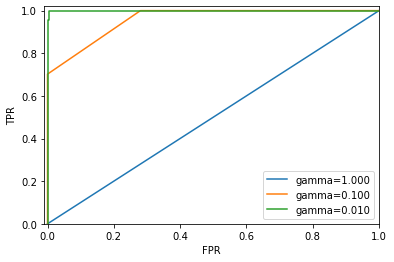

In [37]:
y = digits.target == 9

X_train, X_test, y_train, y_test = train_test_split(digits.data, y, random_state=0)

plt.figure()

for gamma in [1, 0.1, 0.01]:
    svc = SVC(gamma=gamma).fit(X_train, y_train)
    accuracy = svc.score(X_test, y_test)
    auc = roc_auc_score(y_test, svc.decision_function(X_test))
    fpr, tpr, _ = roc_curve(y_test, svc.decision_function(X_test))
    print(f'gamma = {gamma:.3f} acc = {accuracy:.3f} AUC = {auc:.3f}')
    plt.plot(fpr, tpr, label=f'gamma={gamma:.3f}')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.xlim(-0.01, 1)
plt.ylim(0, 1.02)
plt.legend(loc='best')